## Testing CMCC-ESM2 with cmip6_preprocessing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cftime
import xarray as xr
import intake
import cmocean.cm as cmo
from cmip6_preprocessing.preprocessing import combined_preprocessing

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6-noQC.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(table_id='Omon', 
                 experiment_id=['historical'],
                 variable_id=['thetao'],
                 member_id=['r1i1p1f1'],
                 grid_label='gn',
                 source_id=['CMCC-ESM2']
                )

In [3]:
from cmip6_preprocessing.preprocessing import (
    rename_cmip6, 
    promote_empty_dims, 
    correct_coordinates, 
    correct_lon, 
    correct_units, 
    broadcast_lonlat,
    parse_lon_lat_bounds,
    sort_vertex_order,
    maybe_convert_bounds_to_vertex, 
    maybe_convert_vertex_to_bounds,
)

In [4]:
def modified_preprocessing(ds):
    ds = ds.copy()
    # fix naming
    ds = rename_cmip6(ds)
    # promote empty dims to actual coordinates
    ds = promote_empty_dims(ds)
    # demote coordinates from data_variables
    ds = correct_coordinates(ds)
    # broadcast lon/lat
    ds = broadcast_lonlat(ds)
    # shift all lons to consistent 0-360
    ds = correct_lon(ds)
    # fix the units
    ds = correct_units(ds)
    # replace x,y with nominal lon,lat
#     ds = replace_x_y_nominal_lat_lon(ds)
    # rename the `bounds` according to their style (bound or vertex)
    ds = parse_lon_lat_bounds(ds)
    # sort verticies in a consistent manner
    ds = sort_vertex_order(ds)
    # convert vertex into bounds and vice versa, so both are available
    ds = maybe_convert_bounds_to_vertex(ds)
    ds = maybe_convert_vertex_to_bounds(ds)
    return ds

In [5]:
ds = cat.to_dataset_dict(zarr_kwargs={'consolidated':True, 'decode_times':True},
                                preprocess=modified_preprocessing)

test = ds['CMIP.CMCC.CMCC-ESM2.historical.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


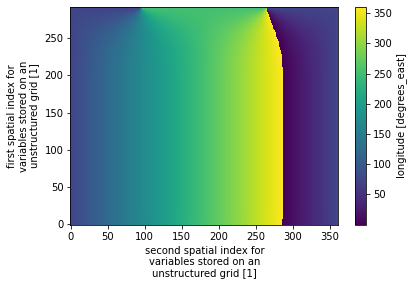

In [6]:
%matplotlib inline
test['lon'].plot()

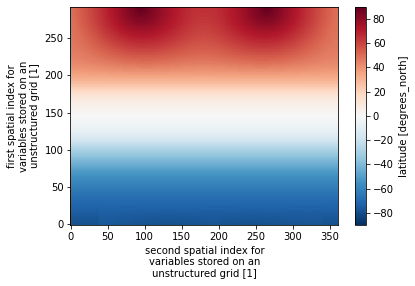

In [7]:
test['lat'].plot()

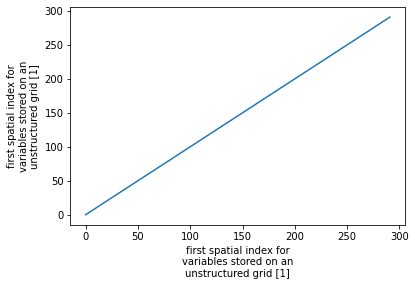

In [8]:
test['x'].plot()

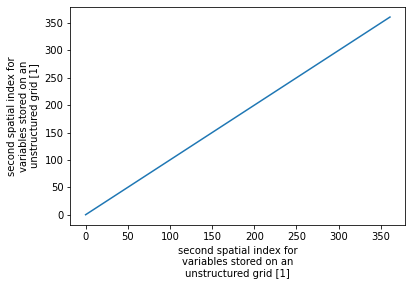

In [9]:
test['y'].plot()